# Python for Matlab Users
    Thursday, 2nd March 2023, 2-4pm
    Computational Seminars @ GSE
    
https://github.com/prisae/Python4MatlabUsers

## The `;`

In Python, statements are NOT printed by default, so you do NOT have to finish every line with a `;`. On the other hand, if you **want** something to be printed, you have to explicitely print it via `print(x)`.

The notebook has an exception in that the last statement of a cell is printed, unless it is an assignment or is surpressed.

In [1]:
x = 1
# print(x)
y = 2
z = 3
# z
# z;

## Loops are different

Loops are an example of different things, amongst other, that **white space matters!**. In turn, there is no `end`.

In Matlab, you would make a loop like:

```
for i=0:4
disp(i)
end
```

Four whitespace is the common intendation.

DON'T USE TABS! (That is a common programming advice...)

In [2]:
for i in range(5):
    print(i)

0
1
2
3
4


# Line continuation

In Matlab you have the three dots `...`.

In Python, you usually use brackets and intendation. Less common is the backslash `\`

In Matlab, you would do
```
a = 1 + ...
2
```

In [3]:
a = (1 +
     2)
a

3

In [4]:
a = 1 + \
    2
a

3

## Let's get started with NumPy; look at the namespace; comments

it is the common numerical library in Python, used in most things. **In NumPy, everything is a multidimensional** (nd) array (not a matrix, as in Matlab).

In Matlab, everthing is in the top namespace. In Python, things are organized in modules/packages, which you have to import. It is good style to import everything you need at the top of your functions. (There is a possibility to import everything from a module/package by using the asterix; do not do that.)

In the next cell we import the two main packages we will use today. You can also see that in Python a comment is marked by `#`, not by a `%` as in Matlab.

In [5]:
import numpy as np               # The base numerical library
import matplotlib.pyplot as plt  # For plotting; there are many alternatives

In Matlab, functions like the square root are in the top namespace
```
sqrt(4)
```

In [6]:
np.sqrt(4)

2.0

In Python/NumPy, rounded brackets `()` are for function calls; square brackets `[]` to access arrays.

In Matlab, you would do
```
a = [1, 2; 3, 4]
```

In [7]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

Matlab:
```
b = linspace(10, 100, 11)
```

In [8]:
b = np.linspace(10, 100, 10)
b

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

The default data type in python is float64:

## OO on arrays!

In [9]:
c = np.arange(24).reshape(3, 4, 2)

In [10]:
c.dtype

dtype('int64')

In [11]:
c.ndim

3

In [12]:
c.size

24

In [13]:
c.shape

(3, 4, 2)

In [14]:
c.min(), c.max()

(0, 23)

In [15]:
c.real, c.imag

(array([[[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7]],
 
        [[ 8,  9],
         [10, 11],
         [12, 13],
         [14, 15]],
 
        [[16, 17],
         [18, 19],
         [20, 21],
         [22, 23]]]),
 array([[[0, 0],
         [0, 0],
         [0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0],
         [0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0],
         [0, 0],
         [0, 0]]]))

## 0-Indexing!

Python takes a lot from the `C` language, and it has therefore 0-indexing. Matlab has therefore 1-indexing.

The last element in NumPy is `-1`, not `end`. Similar, you can access any `-N` element.

Let's take above `b`-array. In Matlab, you can access the first and last index can be accessed via:
```
b(1)    % first index
b(end)  % last index
```

In [16]:
b[0], b[-1], b[-2]

(10.0, 100.0, 90.0)

## Loops

In the following a comparison of different loop structures.

### Simple loop

Matlab
```
for i=0:4
  i
end
```

In [17]:
for i in range(5):
    print(i)

0
1
2
3
4


### If - elseif/elif -- else

Matlab
```
a = 1;
% a = 2;
% a = 3;

if a == 1
  disp('a is one')
elseif a == 2
  disp('a is two')
else
  disp('a is neither one nor two')
end
```

In [18]:
a = 1
# a = 2
# a = 3

if a == 1:
    print('a is one')
elif a == 2:
    print('a is two')
else:
    print('a is neither one nor two')

a is one


In [19]:
for i in range(5):
    print(i)

0
1
2
3
4


### Loop Control

In [20]:
for i in range(6):
    if i < 2:
        continue
    elif i > 4:
        break
    print(i)

2
3
4


## Don't use numpy arrays for everything, they have an overhead

In [21]:
%%timeit

for i in np.arange(5):
    pass

1.57 µs ± 387 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [22]:
%%timeit

for i in range(5):
    pass

206 ns ± 44.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Logical operators

The Matlab operators `&&` and `||` are `and` and `or` in Python.

In [23]:
a = 1
b = 2
a == 1 and b == 1

False

In [24]:
a == 1 or b == 1

True

They only work on scalars. Otherwise you'll need the NumPy equivalents, `np.logical_{and;not;or;xor}`.

In [25]:
a = np.ones(5)
b = np.ones(5)*2
print(f"a, {a}")
print(f"b, {b}")
np.logical_and(a==1, b==1)

a, [1. 1. 1. 1. 1.]
b, [2. 2. 2. 2. 2.]


array([False, False, False, False, False])

In [26]:
np.logical_and(a==1, b==2).all()

True

In [27]:
c = np.arange(5)
print(f"c, {c}")
np.logical_and(a==1, b==c).sum()

c, [0 1 2 3 4]


1

## Help

In Matlab, you could type
```
help sqrt
```
In Python you use `?`, or tab-completion, or `??`, or hoover-over (in, e.g., Spyder).

In [28]:
np.sqrt?

### To the power of

In Matlab, you use `^`, in Python, you use `**`:

In [29]:
3**4

81

## Same in both: In-place computations!

In [30]:
%%timeit
a = 1
for i in range(5):
    a += i
    
a

328 ns ± 75.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [31]:
%%timeit
a = 1
for i in range(5):
    a = a + i
    
a

302 ns ± 51.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


This _really_ pays out for large arrays, both in speed and in memory! And this applies for all operators, hence `+`, `-`, `*`, `/`.

# Still ToDo

- several functions in one file!
- bloody .
- dot, @, ...
- /\inv...
- struct, dicts, pandas
- matplotlib
- references and copies (a = b)
- slicing
- functions, classes, return
- floor division
- @, einsum
- is, not
- Plotting

## Common things not (yet) covered

- `with`
- `yield`
- `try` - `except` - `else`
- `assert`
- `raise`
- `ravel`, `flatten`, `squeeze`
- `copy`
- slicing and broadcasting
- list comprehension
- lists and tuples, dicts

# Bonus to finish off

## Jupyter ecosystem is language agnostic!

See https://github.com/jupyter/jupyter/wiki/Jupyter-kernels for a list of available kernels.

To run, e.g., `octave` in a notebook, you need to install `octave_kernel` and, of course, `octave`. Then you can create a new notebook and select the octave kernel. The entire notebook is then octave (there is also a Matlab kernel, by the way).

You can even run different languages in the same notebook. E.g., this is a Python notebook. If you install `oct2py`, you can also run octave WITHIN the python notebook, either entire cells or only lines.

Example of an entire cell (note the `%%` syntax):

In [32]:
# You need the following to lines
import oct2py
%load_ext oct2py.ipython

In [33]:
%%octave

m = 2;
for i=0:5
    m = m^2;
end
m

m = 1.8447e+19

Inline usage

In [34]:
# Python stuff

x = np.arange(8)

%octave X = [1 2; 3 4]; mean(X);

array([[2., 3.]])

You can also call octave through a Python instance

In [35]:
oc = oct2py.Oct2Py()
oc.zeros(3, 3)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Plotting in Octave

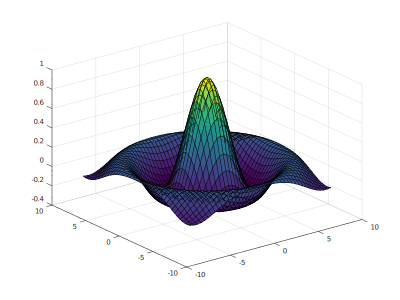

In [36]:
%%octave -f svg -h 300
sombrero

In [37]:
# For easier reproducibility
try:
    from scooby import Report    
except ModuleNotFoundError as e:
    class Report:
        def __init__(self, *args, **kwargs):
            pass
        def _repr_html_(self):
            return 'For the `Report()` you need to install `scooby`!'

Report(['oct2py'])

--------------------------------------------------------------------------------
  Date: Wed Mar 01 22:05:44 2023 CET

                OS : Linux
            CPU(s) : 4
           Machine : x86_64
      Architecture : 64bit
               RAM : 15.5 GiB
       Environment : Jupyter
       File system : ext4

  Python 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:20:04) [GCC
  11.3.0]

            oct2py : 5.6.0
             numpy : 1.23.5
             scipy : 1.10.0
           IPython : 8.9.0
        matplotlib : 3.6.3
            scooby : 0.7.1

  Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804
  for Intel(R) 64 architecture applications
--------------------------------------------------------------------------------